In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
search_ffi = lk.search_tesscut("TIC 452866790")
search_tpf = lk.search_targetpixelfile("TIC 452866790")
search_lcf = lk.search_lightcurve("TIC 452866790")

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 07,2019,TESScut,1426,TIC 452866790,0.0
1,TESS Sector 34,2021,TESScut,475,TIC 452866790,0.0


In [4]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 07,2019,SPOC,120,452866790,0.0
1,TESS Sector 07,2019,TESS-SPOC,1800,452866790,0.0
2,TESS Sector 34,2021,SPOC,120,452866790,0.0
3,TESS Sector 34,2021,TESS-SPOC,600,452866790,0.0


In [5]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 07,2019,SPOC,120,452866790,0.0
1,TESS Sector 07,2019,TESS-SPOC,1800,452866790,0.0
2,TESS Sector 07,2019,QLP,1800,452866790,0.0
3,TESS Sector 34,2021,SPOC,120,452866790,0.0
4,TESS Sector 34,2021,TESS-SPOC,600,452866790,0.0
5,TESS Sector 34,2021,QLP,600,452866790,0.0


In [6]:
lcf = search_lcf.download_all()

In [7]:
lcf

LightCurveCollection of 6 objects:
    0: <TessLightCurve LABEL="TIC 452866790" SECTOR=7 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 452866790" SECTOR=7 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 452866790" SECTOR=7 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    3: <TessLightCurve LABEL="TIC 452866790" SECTOR=34 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    4: <TessLightCurve LABEL="TIC 452866790" SECTOR=34 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    5: <TessLightCurve LABEL="TIC 452866790" SECTOR=34 AUTHOR=QLP FLUX_ORIGIN=sap_flux>

In [8]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1491.6370560737237,5.1877568e+03,1.0759117e+01,5.2948296e-03,190207,1766.51049,1893.52215,3.6015527e+03,7.3713970e+00,7.7063391e+02,1.7101731e+00,5.1877568e+03,1.0759117e+01,0,nan,nan,nan,nan,1766.51049,1.0023733e-03,1893.52215,1.0020157e-03,4.6301312e-03,1.3960969e-01
1491.6384450030127,5.1925405e+03,1.0750216e+01,5.2948706e-03,190208,1766.51655,1893.50668,3.6046079e+03,7.3652978e+00,7.6853351e+02,1.7060429e+00,5.1925405e+03,1.0750216e+01,0,nan,nan,nan,nan,1766.51655,1.0005668e-03,1893.50668,1.0008516e-03,1.2206719e-02,1.2211403e-01
1491.6398339318353,5.1978672e+03,1.0757538e+01,5.2949111e-03,190209,1766.51053,1893.51657,3.6140066e+03,7.3703151e+00,7.6637073e+02,1.7069198e+00,5.1978672e+03,1.0757538e+01,0,nan,nan,nan,nan,1766.51053,9.9883229e-04,1893.51657,9.9870667e-04,6.6055050e-03,1.3268553e-01
1491.641222861123,5.1970322e+03,1.0752131e+01,5.2949521e-03,190210,1766.51756,1893.50473,3.6127209e+03,7.3666105e+00,7.6297034e+02,1.7028078e+00,5.1970322e+03,1.0752131e+01,0,nan,nan,nan,nan,1766.51756,9.9855463e-04,1893.50473,9.9888642e-04,1.3141161e-02,1.2024441e-01
1491.642611790412,5.1986191e+03,1.0752783e+01,5.2949931e-03,190211,1766.51439,1893.51023,3.6127031e+03,7.3670568e+00,7.6321393e+02,1.7049307e+00,5.1986191e+03,1.0752783e+01,0,nan,nan,nan,nan,1766.51439,9.9865056e-04,1893.51023,9.9882926e-04,9.4659450e-03,1.2678544e-01
1491.644000719701,5.2111050e+03,1.0762316e+01,5.2950340e-03,190212,1766.51398,1893.50979,3.6200520e+03,7.3735881e+00,7.6465106e+02,1.7051016e+00,5.2111050e+03,1.0762316e+01,0,nan,nan,nan,nan,1766.51398,9.9757500e-04,1893.50979,9.9772098e-04,8.3268778e-03,1.2751712e-01
1491.6453896489884,5.2026343e+03,1.0747170e+01,5.2950750e-03,190213,1766.51325,1893.50742,3.6119646e+03,7.3632121e+00,7.6105927e+02,1.7036313e+00,5.2026343e+03,1.0747170e+01,0,nan,nan,nan,nan,1766.51325,9.9839352e-04,1893.50742,9.9857280e-04,9.3100015e-03,1.2298273e-01
1491.6467785782768,5.1997456e+03,1.0729476e+01,5.2951160e-03,190214,1766.51600,1893.50624,3.6048647e+03,7.3510895e+00,7.5560938e+02,1.6972978e+00,5.1997456e+03,1.0729476e+01,0,nan,nan,nan,nan,1766.51600,9.9873310e-04,1893.50624,9.9898817e-04,1.1481249e-02,1.2214400e-01


ax = lcf[0].plot(label='PCDSAP Flux', normalize=True)
lcf[0].plot(column='sap_flux', normalize=True, label='SAP Flux', ax=ax);

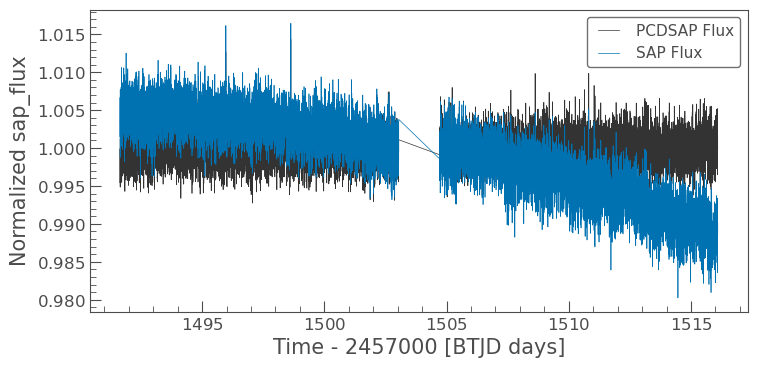

In [9]:
ax = lcf[0].plot(label='PCDSAP Flux', normalize=True)
lcf[0].plot(column='sap_flux', normalize=True, label='SAP Flux', ax=ax);

Text(0.5, 1.0, 'PCDSAP light curve of GJ 3473')

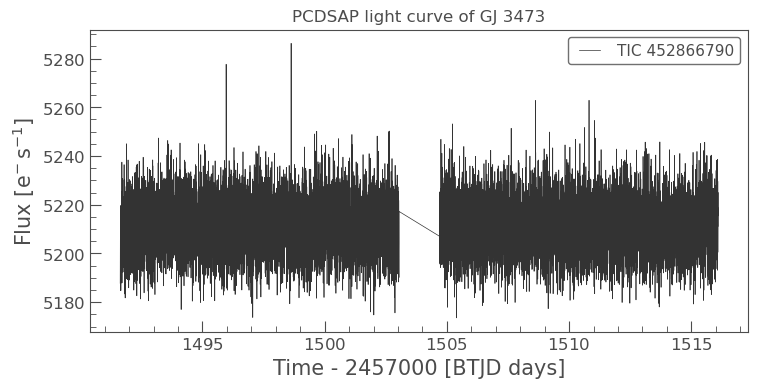

In [10]:
ax = lcf[0].plot()
ax.set_title("PCDSAP light curve of GJ 3473")

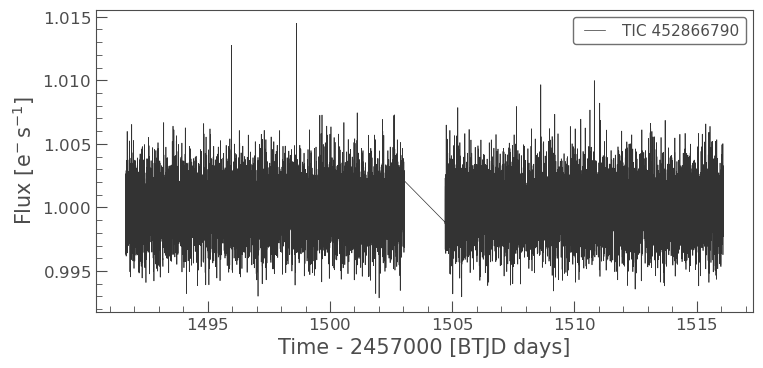

In [11]:
flat_lc = lcf[0].flatten(window_length=401)
flat_lc.plot();

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

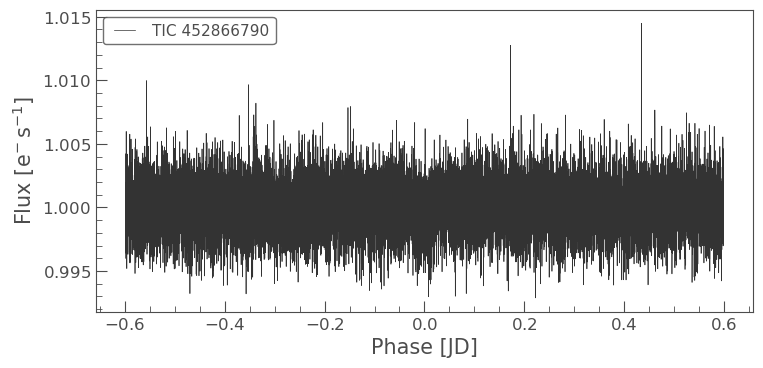

In [12]:
folded_lc = flat_lc.fold(period = 1.1980035, epoch_time =1492.20408 )
folded_lc.plot()

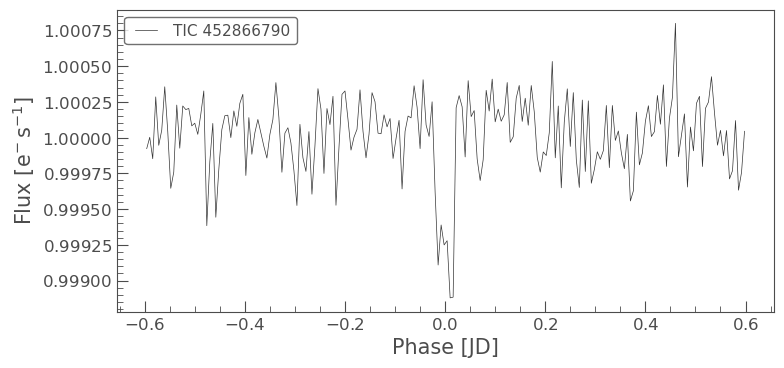

In [13]:
binned_lc = folded_lc.bin(time_bin_size = 0.006)
binned_lc.plot();